In [3]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_faces = fetch_olivetti_faces()

In [6]:
data = olivetti_faces.data
target = olivetti_faces.target

In [ ]:
from sklearn.model_selection import train_test_split

#  split it into a training set, a validation set, and a test set
# stratified sampling to ensure that there are the same number of images per person in each set.
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=42, stratify=target)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42 , stratify=y_temp)

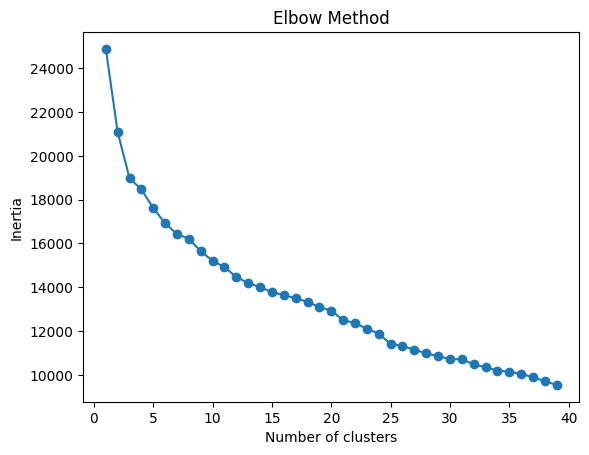

In [12]:
# elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 40), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

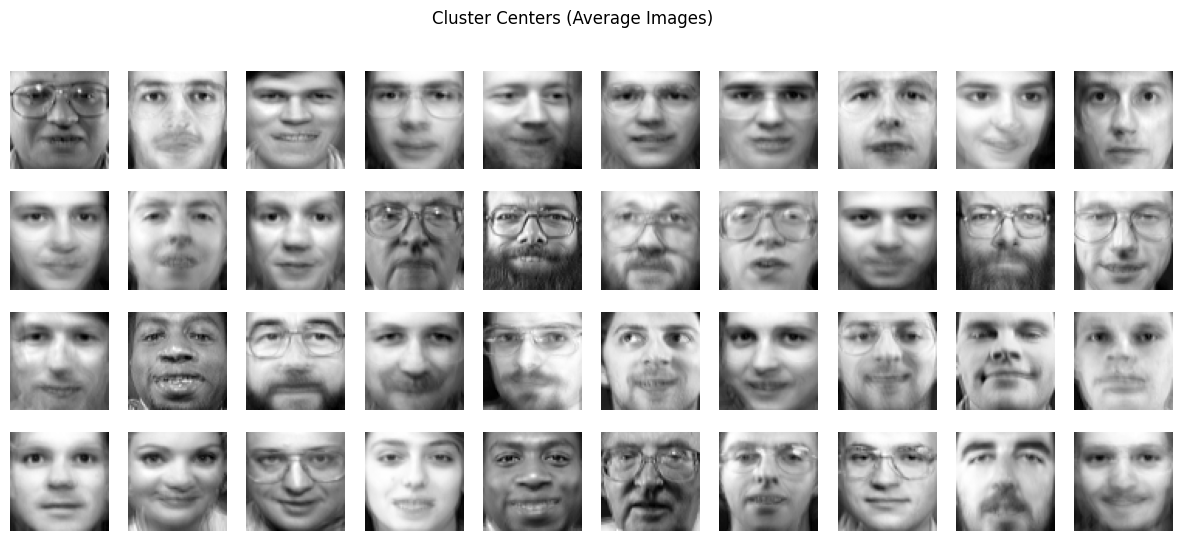

In [10]:
# cluster the images using K-Means, and ensure that you have a good number of clusters.
from sklearn.cluster import KMeans
k = 40
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# assign each image to the nearest cluster center, and display the average image of each cluster.
import numpy as np

def plot_cluster_centers(kmeans, n_clusters, image_shape):
    fig, axes = plt.subplots(4, 10, figsize=(15, 6))
    for i in range(n_clusters):
        cluster_center = kmeans.cluster_centers_[i].reshape(image_shape)
        ax = axes[i // 10, i % 10]
        ax.imshow(cluster_center, cmap='gray')
        ax.axis('off')
    plt.suptitle('Cluster Centers (Average Images)')
    plt.show()
plot_cluster_centers(kmeans, k, (64, 64))